In [1]:
import sys 
sys.path.append("..") # this is to import elm.py
import elm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import scipy
import os

## test if the ELM is correct

In [2]:
stdsc = StandardScaler()
# load dataset
iris = load_iris()
irx, iry = stdsc.fit_transform(iris.data), iris.target
x_train, x_test, y_train, y_test = train_test_split(irx, iry, test_size=0.2)
# built model and train
model = elm.elm(hidden_units=35, activation_function='relu', random_type='normal', x=x_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
# print("classifier beta:\n", beta)
print("classifier train accuracy:", train_accuracy)
# print('classifier running time:', running_time)

# test
# prediction = model.predict(x_test)
# print("classifier test prediction:", prediction)
print('classifier test accuracy:', model.score(x_test, y_test))

classifier train accuracy: 0.9666666666666667
classifier test accuracy: 0.9


# test the graph data
---

## the functions about ploting

In [3]:
def acc_curve(n,X_train,X_test,y_train,y_test,C=0.1):
    '''
    function to fit a model with hidden_layer's num equals to n
    @param
    * X_train,X_test,y_train,y_test is the datasets used to fit the model
    * C is the regular paramter
    * n is the hidden_layer's num
    '''
    model=elm.elm(
        hidden_units=n, 
        activation_function='sigmoid', 
        random_type='normal', 
        x=X_train, y=y_train, 
        C=C, elm_type='clf'
    )
    _, train_accuracy, _ = model.fit('solution2')
    test_accuracy=model.score(X_test,y_test)
    return (train_accuracy,test_accuracy)

def plot_train_test_curve(X_train,X_test,y_train,y_test,C=0.01,title='with all features'):
    '''
    function to plot the training and testing accuracy curve
    @param
    * X_train,X_test,y_train,y_test is the datasets used to fit the model
    * C is the regular paramter
    '''
    train_accuracy_list=[]
    test_accuracy_list=[]
    x_plot=[*range(5,300,5)]
    for i in range(5,300,5):
        acc_train,acc_test=acc_curve(i,X_train,X_test,y_train,y_test,C)
        train_accuracy_list.append(acc_train)
        test_accuracy_list.append(acc_test)
    plt.figure(figsize=(15,5))
    plt.plot(x_plot,train_accuracy_list,color='r',label='train_accuracy')
    plt.plot(x_plot,test_accuracy_list,color='b',label='test_accuracy')
    plt.legend()
    plt.xticks([*range(5,300,15)])
    plt.grid()
    plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('nums of hidden layer')
    plt.show()

def sift_features(df,dislike_fea=[]):
    '''
    function to sift the features,in order to figure out that what feature have great influence to the prediction
    @param
    * dislike_fea: (list),the elements of the list is str
    '''
    X=df[df.columns.difference(['class','source','target']+dislike_fea)]
    y=df['class'].values
    ss=StandardScaler()
    X_norm=ss.fit_transform(X)
    return X_norm,y

In [4]:
df_list=[]
df_dir_path='df_list\\'
for df_name in os.listdir(df_dir_path):
    file_path=os.path.join(df_dir_path,df_name)
    tmp_df=pd.read_csv(file_path,index_col=0)
    df_list.append(tmp_df)
df_graph=df_list[0]
df_graph

,source,target,class,AA,ADP,CAA,CAR,CCLP,CN,CNDP,CRA,HDI,HPI,Jaccard,LHN_I,NLC,RA,Salton,Sorensen
0,Florida,LouisianaMonroe,0,0.872152,0.364698,0.000000,0.0,0.557071,2.0,0.000000,0.000000,0.181818,0.250000,0.117647,0.022727,0.344811,0.202020,0.213201,0.210526
1,LouisianaMonroe,Memphis,0,0.417032,0.168800,0.000000,0.0,0.418182,1.0,0.000000,0.000000,0.090909,0.125000,0.055556,0.011364,0.167273,0.090909,0.106600,0.105263
2,Auburn,Oklahoma,0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,NewMexicoState,SanJoseState,0,0.819462,0.327047,0.819462,2.0,1.018182,2.0,0.327047,0.174242,0.181818,0.181818,0.100000,0.016529,0.781488,0.174242,0.181818,0.181818
4,Kent,AlabamaBirmingham,0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,NorthernIllinois,Tulane,0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1222,Houston,Cincinnati,1,2.119686,0.868737,6.776091,40.0,1.872727,5.0,2.775011,1.509091,0.454545,0.454545,0.294118,0.041322,2.034343,0.472727,0.454545,0.454545
1223,GeorgiaTech,Toledo,0,0.417032,0.168800,0.000000,0.0,0.181818,1.0,0.000000,0.000000,0.090909,0.111111,0.052632,0.010101,0.018182,0.090909,0.100504,0.100000
1224,ColoradoState,Nevada,1,0.819462,0.327047,0.819462,2.0,0.781818,2.0,0.327047,0.174242,0.166667,0.200000,0.100000,0.016667,0.706942,0.174242,0.182574,0.181818


# take a look of the correlation of the features

<AxesSubplot:>

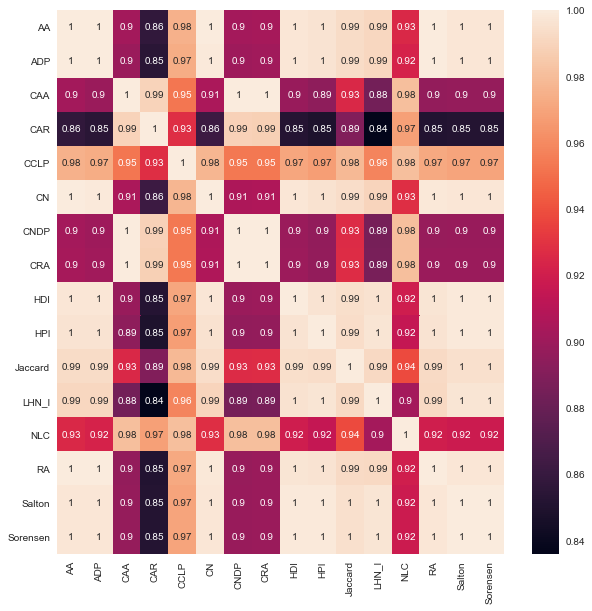

In [14]:
%matplotlib inline
complete_features=df_graph.loc[:,df_graph.columns.difference(['source','taregt','class'])]
# 绘制热力图
plt.figure(figsize=(10,10))
sns.heatmap(complete_features.corr(),annot=True)

In [25]:
# features_set=list(df_graph.columns.difference(['source','target','class']))
# plt.figure(figsize=[15,20])
# plt.title('feature distribution')
# for i,fea in enumerate(features_set):
#     title=fea
#     plt.subplot(4,2,i+1)
#     _, bins, _=plt.hist(df_graph[fea].values,bins=50)
#     '''-------plot the fitting curve for the hist---------'''
#     # mu, sigma = scipy.stats.norm.fit(df_graph[fea].values)
#     # best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
#     # plt.plot(bins, best_fit_line)
#     '''---------------------------------------------------'''
#     plt.title(title)
#     plt.xlabel('value')
#     plt.ylabel('count')

# take a look of the distribution of the features

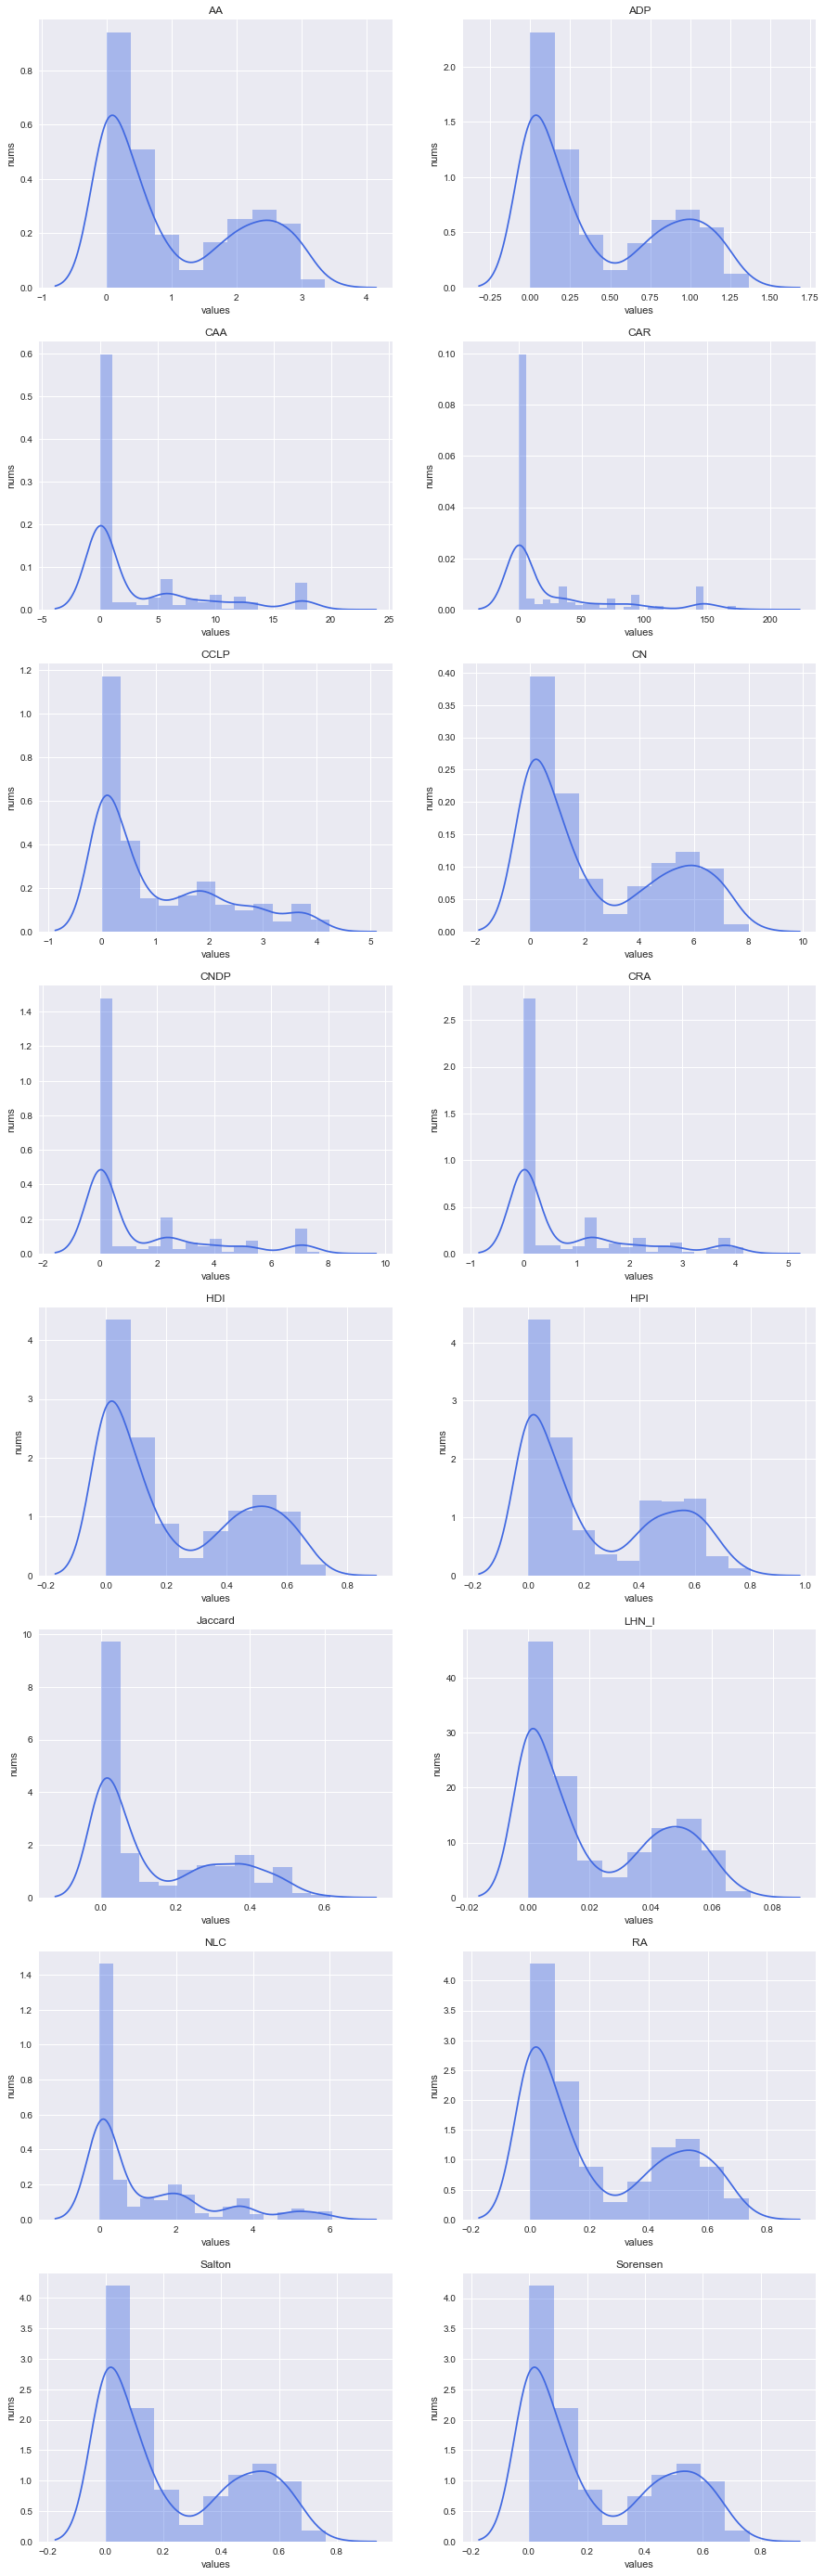

In [17]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

features_set=list(df_graph.columns.difference(['source','target','class']))
fig, axes = plt.subplots(ncols=2, nrows=8,figsize=[15,50])
for i, ax, fea in zip(range(16), axes.flat,features_set):
    ax.set_title(fea)
    ax.set_xlabel('values')
    ax.set_ylabel('nums')
    sns.distplot(df_graph[fea].values,
        hist=True,kde=True, ax=ax,color='royalblue')
plt.show()

# test the accuracy

## with all features

# i think that the reason why the accuracy is so high is that the node_path is highly relate to the label
# if the label is 1, the node_path is definatly 2

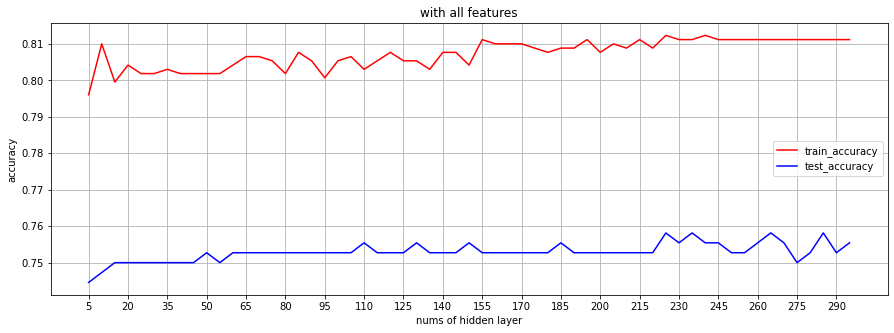

In [6]:
# with all features
X_norm,y=sift_features(df_graph)
X_train,X_test,y_train,y_test=train_test_split(X_norm, y, test_size=0.3)
plot_train_test_curve(X_train,X_test,y_train,y_test,C=0.1)

In [8]:
# so we choose the nums of hidden_units=35
model=elm.elm(hidden_units=35, activation_function='sigmoid', 
    random_type='normal', x=X_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
print("classifier train accuracy:", train_accuracy)
prediction = model.predict(X_test)
# print("classifier test prediction:", prediction)
print('classifier test accuracy:', model.score(X_test, y_test))

classifier train accuracy: 0.9848484848484849
classifier test accuracy: 0.9728260869565217


## without node_path

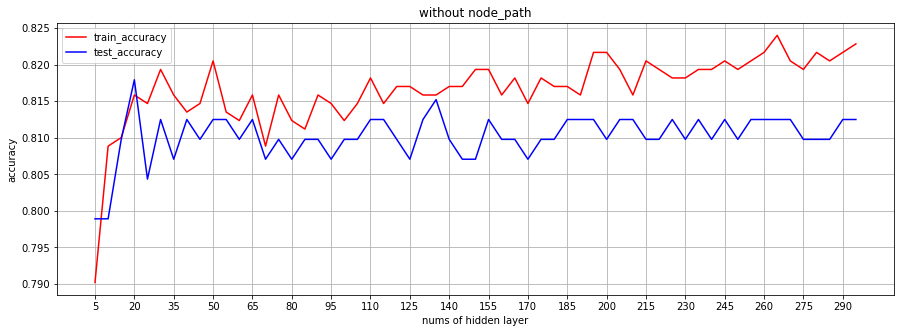

In [124]:
# without node_path
X_norm,y=sift_features(df_graph,dislike_fea=['node_path'])
X_train,X_test,y_train,y_test=train_test_split(X_norm, y, test_size=0.3)
plot_train_test_curve(X_train,X_test,y_train,y_test,C=0.1,title='without node_path')

In [126]:
# so we choose the nums of hidden_units=35
model=elm.elm(hidden_units=20, activation_function='sigmoid', 
    random_type='normal', x=X_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
print("classifier train accuracy:", train_accuracy)
prediction = model.predict(X_test)
# print("classifier test prediction:", prediction)
print('classifier test accuracy:', model.score(X_test, y_test))

classifier train accuracy: 0.8146853146853147
classifier test accuracy: 0.8070652173913043


## without node_path,totoal_degree_neighbors_a, totoal_degree_neighbors_b, total_degree_common_neighbor

## the model's variance is so high that every time i plot the training curve, it will change
## so i just plot it in 3 times 

## 1st

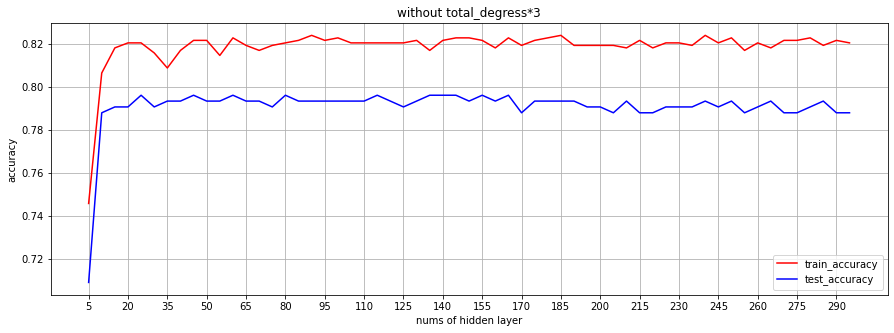

In [48]:
# without node_path ,totoal_degree_neighbors_a, totoal_degree_neighbors_b, total_degree_common_neighbor
X_norm,y=sift_features(df_graph,dislike_fea=['node_path','totoal_degree_neighbors_a', 
    'totoal_degree_neighbors_b', 'total_degree_common_neighbor'])
X_train,X_test,y_train,y_test=train_test_split(X_norm, y, test_size=0.3)
plot_train_test_curve(X_train,X_test,y_train,y_test,C=0.1,title='without total_degress*3')

## 2nd

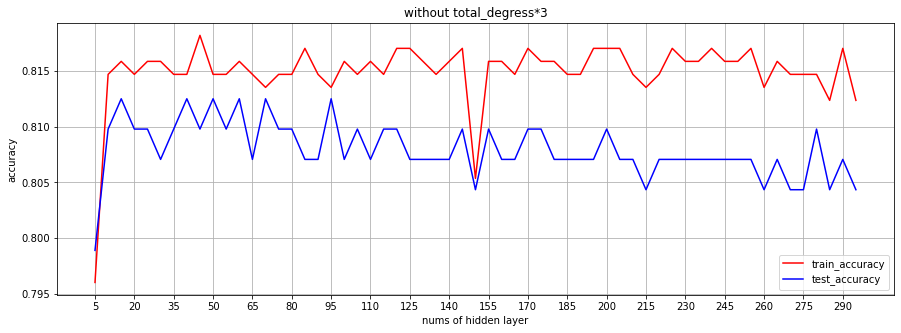

In [51]:
# without node_path ,totoal_degree_neighbors_a, totoal_degree_neighbors_b, total_degree_common_neighbor
X_norm,y=sift_features(df_graph,dislike_fea=['node_path','totoal_degree_neighbors_a', 
    'totoal_degree_neighbors_b', 'total_degree_common_neighbor'])
X_train,X_test,y_train,y_test=train_test_split(X_norm, y, test_size=0.3)
plot_train_test_curve(X_train,X_test,y_train,y_test,C=0.1,title='without total_degress*3')

## 3

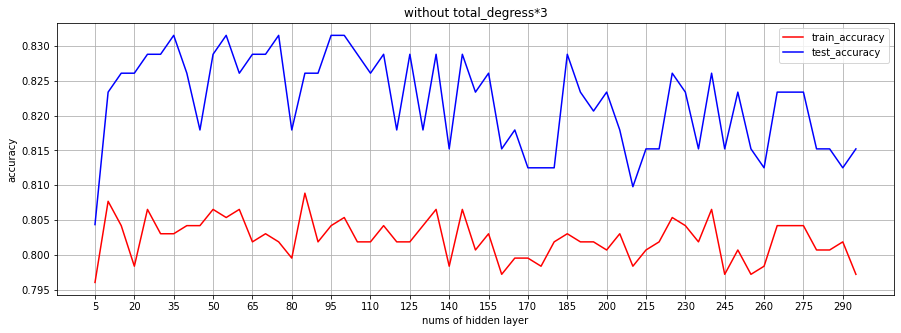

In [53]:
# without node_path ,totoal_degree_neighbors_a, totoal_degree_neighbors_b, total_degree_common_neighbor
X_norm,y=sift_features(df_graph,dislike_fea=['node_path','totoal_degree_neighbors_a', 
    'totoal_degree_neighbors_b', 'total_degree_common_neighbor'])
X_train,X_test,y_train,y_test=train_test_split(X_norm, y, test_size=0.3)
plot_train_test_curve(X_train,X_test,y_train,y_test,C=0.1,title='without total_degress*3')

# pca in order to visualize

In [128]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 

def plot_pca(num,data,label):
    pca=PCA(n_components=num)
    X_pca=pca.fit_transform(data)
    print(pca.components_)
    # 分割数据
    X_failure=np.array([x for i,x in enumerate(X_pca) if label[i]==1])
    X_healthy=np.array([x for i,x in enumerate(X_pca) if label[i]==0])
    
    if num==3:
        fig = plt.figure(figsize=[10,15])
        ax = Axes3D(fig)   
        #ax.legend(loc='best')
        ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
        ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
        ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
        ax.scatter(X_failure[:,0], X_failure[:,1], X_failure[:,2])
        ax.scatter(X_healthy[:,0], X_healthy[:,1], X_healthy[:,2])
    elif num==2:
        plt.figure(figsize=[10,10])
        plt.scatter(X_failure[:,0],X_failure[:,1])
        plt.scatter(X_healthy[:,0],X_healthy[:,1])
    else:
        print('i do not want to work.....')


[[-0.44675705 -0.44958181 -0.28128471 -0.45408921 -0.46352306 -0.31322932]
 [ 0.31599362  0.11389156 -0.63581873  0.30818749  0.08577546 -0.61690707]
 [ 0.44953741 -0.53717524  0.143106    0.4439708  -0.52363196  0.13258598]]


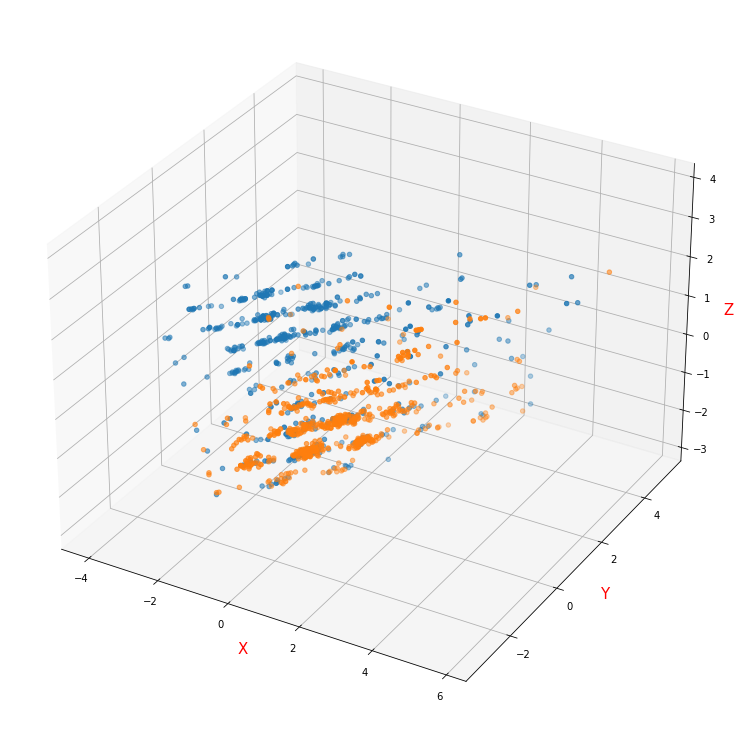

In [129]:
# to visualize the data without the node_path feature
# %matplotlib auto
X_norm,y=sift_features(df_graph,dislike_fea=['node_path'])
plot_pca(num=3,data=X_norm,label=y)

In [86]:
%matplotlib inline